<a href="https://colab.research.google.com/github/HarmanBhutani/ML_projects/blob/main/DS_Assignment_3_Part_2_Harman_Bhutani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install contractions 

     |████████████████████████████████| 266kB 11.9MB/s 
     |████████████████████████████████| 327kB 28.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=85269 sha256=c37cc0f2045da80938a16a57075975c67e5c457f3fb8e1acc7543a5ad5b006a9
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


In [2]:
import pandas as pd
import numpy as np
import re
import spacy   
from spacy.lang.en import English  
nlp = English() 
import nltk
from wordcloud import WordCloud   
import contractions
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
from sklearn.preprocessing import LabelEncoder
import snowballstemmer
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
import string
import seaborn as sns

# Support Vector Machines
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier


le = LabelEncoder()


In [7]:
train_df = pd.read_csv('Covid_train_data.csv', encoding = 'ISO-8859-1')
test_df = pd.read_csv('Covid_test_data.csv', encoding = 'ISO-8859-1')

In [8]:
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [9]:
train_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [10]:
len(train_df)

41157

In [11]:
def remove_punct(string):
  result = re.sub('\d+','   ',str(string))
  return result

def remove_punct2(string):
  result = re.sub(r'[^\w\s]',' ',str(string))
  return result

In [12]:
train_df['Location']=train_df['Location'].apply(lambda cw : remove_punct(cw))
train_df['Location']=train_df['Location'].apply(lambda cw : remove_punct2(cw))

<b>1. Carry out an exploratory data analysis of the data to determine the number of tweets for each sentiment and for each location. Also, plot the distribution graph (Histogram / Bar chart) of each sentiment.</b>

In [ ]:
# Print the value counts of Sentiments column
Sentiments_count=train_data["Sentiment"].value_counts()
Sentiments_count

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

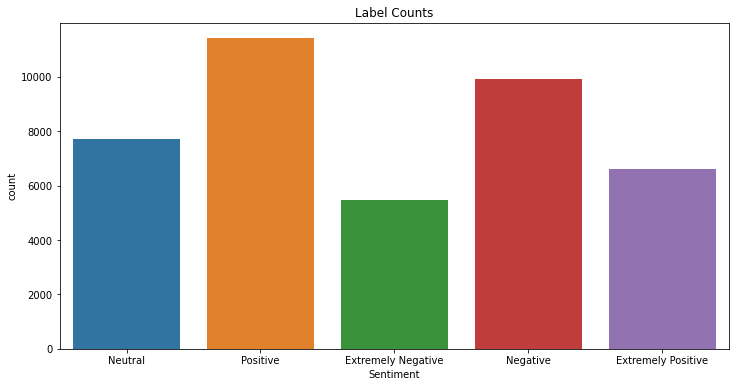

In [ ]:
plt.figure(figsize = (12, 6)) 
sns.countplot(train_raw["Sentiment"])
plt.title("Label Counts")
plt.show()

In [ ]:
positive_sentiment = train_raw.loc[train_raw['Sentiment']=='Positive','OriginalTweet']
negative_sentiment = train_raw.loc[train_raw['Sentiment']=='Negative','OriginalTweet']
Ext_positive_sentiment = train_raw.loc[train_raw['Sentiment']=='Extremely Positive','OriginalTweet']
Ext_negative_sentiment = train_raw.loc[train_raw['Sentiment']=='Extremely Negative','OriginalTweet']
neutral = train_raw.loc[train_raw['Sentiment']=='Neutral','OriginalTweet']

In [ ]:
Location = train_raw.Location.unique()

In [ ]:
Sent = ['Extremely Negative', 'Negative' , 'Neutral','Positive','Entremely Positive']

In [ ]:
Location_tweets_count = {}

for i in Location:
  Location_tweets_count[i] = {}
  for j in Sent:
    count = len(train_raw[(train_raw.Location == i) & (train_raw.Sentiment == j)])
    Location_tweets_count[i][j] = count

In [ ]:
Loc_tweets_sent_count = pd.DataFrame(Location_tweets_count).transpose()

In [ ]:
Loc_tweets_sent_count.head()

,Extremely Negative,Negative,Neutral,Positive,Entremely Positive
London,74,134,105,157,0
UK,33,54,45,59,0
Vagabonds,0,0,0,1,0
nan,1232,2154,1541,2312,0
Ã T,2,18,19,20,0


In [ ]:
Loc_tweets_sent_count_10_cities = Loc_tweets_sent_count[0:10]

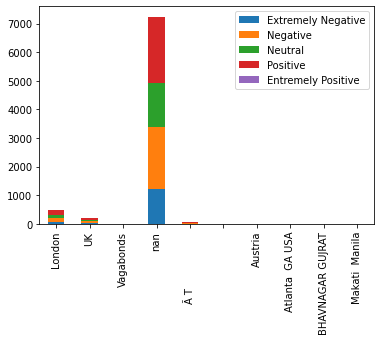

In [ ]:

Loc_tweets_sent_count_10_cities.plot(kind="bar", stacked=True)
plt.show()

<b>2. Generate word clouds for each sentiment.</b>

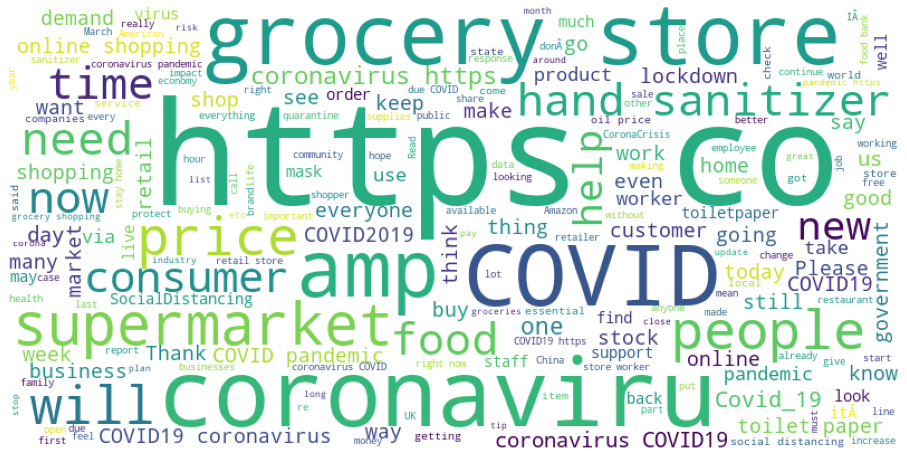

In [ ]:
## positive word cloud
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_sentiment))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

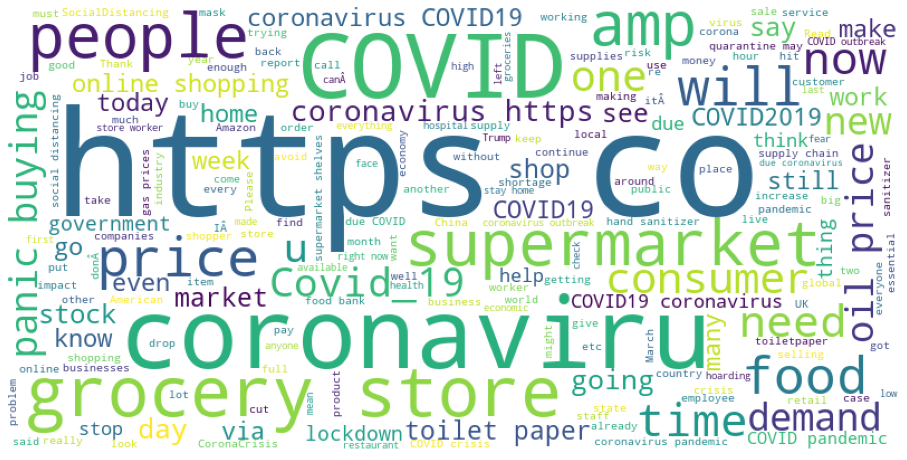

In [ ]:
## Negative word cloud
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_sentiment))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

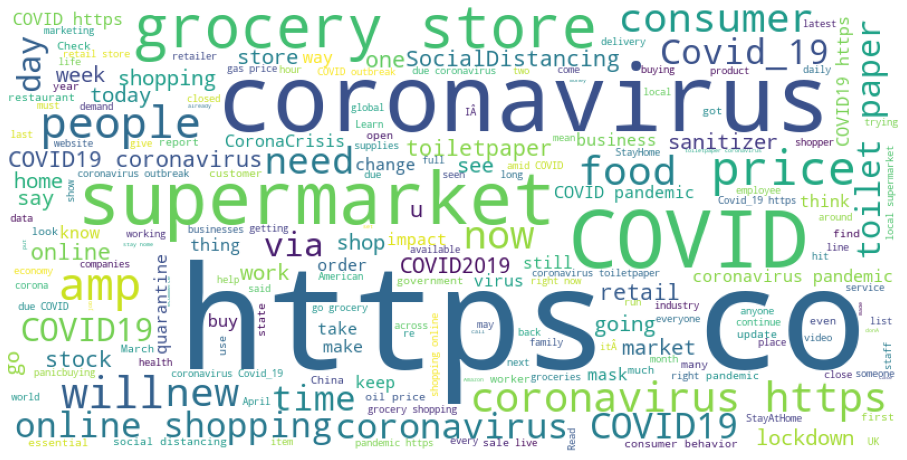

In [ ]:
## Neutral word cloud
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

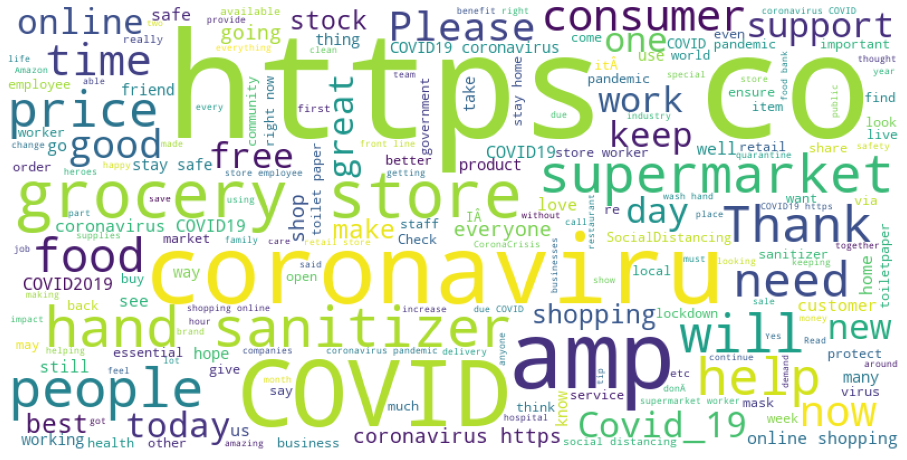

In [ ]:
## Extremely Positive word cloud
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(Ext_positive_sentiment))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

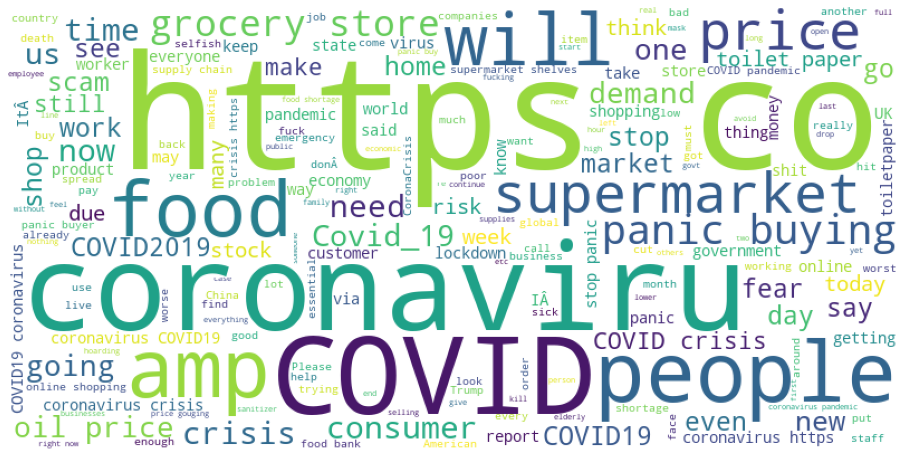

In [ ]:
## Extremely Negative word cloud
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(Ext_negative_sentiment))
plt.figure(figsize = (16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<b>3. Preprocess the data in readiness for vectorization (remove stop words, lemmatize, tokenize, etc.)</b>

In [ ]:
Tweets_Train = pd.DataFrame([train_raw.OriginalTweet ,train_raw.Sentiment]).transpose()
Tweets_Test = pd.DataFrame([test_raw.OriginalTweet]).transpose()

In [ ]:
Tweets_Train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
def remove_tags_tweets(string):
    result = re.sub('<.*?>',' ',str(string))
    return result

def remove_punct_tweets(string):
  result = re.sub('[^a-zA-Z :\.]','',str(string))
  return result

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
stemmer = snowballstemmer.EnglishStemmer()

def tokenize(s): 
    tokens = re_tok.sub(r' \1 ', s).split()
    return stemmer.stemWords(tokens)

In [ ]:
Tweets_Train['with_out_tags']=Tweets_Train['OriginalTweet'].apply(lambda cw : remove_tags_tweets(cw))
Tweets_Train['no_contract'] = Tweets_Train['with_out_tags'].apply(lambda x: [contractions.fix(word) for word in x.split()])
Tweets_Train['no_contract'] = [' '.join(map(str, l)) for l in Tweets_Train['no_contract']]
Tweets_Train['no_punct']=Tweets_Train['no_contract'].apply(lambda cw : remove_punct_tweets(cw))
Tweets_Train['word_tokenized'] = Tweets_Train['no_punct'].apply(word_tokenize)
Tweets_Train['lower'] = Tweets_Train['word_tokenized'].apply(lambda x: [word.lower() for word in x])
Tweets_Train['stopwords_removed'] = Tweets_Train['lower'].apply(lambda x: [word for word in x if word not in stop_words])
Tweets_Train['pos_tags'] = Tweets_Train['stopwords_removed'].apply(nltk.tag.pos_tag)
Tweets_Train['wordnet_pos'] = Tweets_Train['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
Tweets_Train['lemmatized'] = Tweets_Train['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])


In [ ]:
lemmatized_tweets = Tweets_Train['lemmatized']

In [ ]:
str_lem = ''
for i in lemmatized_tweets:
  for j in i:
    #print(j)
    str_lem += j
    str_lem +=" "

In [ ]:
train_data = pd.DataFrame([train_raw.OriginalTweet ,train_raw.Sentiment]).transpose()
test_data = pd.DataFrame([test_raw.OriginalTweet, test_raw.Sentiment]).transpose()

In [ ]:
train_data['target'] = le.fit_transform(train_data['Sentiment'])
test_data['target'] = le.fit_transform(test_data['Sentiment'])

In [ ]:
train_data.head()

,OriginalTweet,Sentiment,target
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,advice Talk to your neighbours family to excha...,Positive,4
2,Coronavirus Australia: Woolworths to give elde...,Positive,4
3,My food stock is not the only one which is emp...,Positive,4
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [ ]:
test_data.head()

,OriginalTweet,Sentiment,target
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,0
1,When I couldn't find hand sanitizer at Fred Me...,Positive,4
2,Find out how you can protect yourself and love...,Extremely Positive,1
3,#Panic buying hits #NewYork City as anxious sh...,Negative,2
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,3


In [ ]:
train_data = clean_text(train_data, "OriginalTweet")
test_data = clean_text(test_data,"OriginalTweet")

In [ ]:
train_data.head()

,OriginalTweet,Sentiment,target
0,gahan and and,Neutral,3
1,advice talk to your neighbours family to excha...,Positive,4
2,coronavirus australia woolworths to give elder...,Positive,4
3,my food stock is not the only one which is emp...,Positive,4
4,me ready to go at supermarket during the covid...,Extremely Negative,0


In [ ]:
test_data.head()

,OriginalTweet,Sentiment,target
0,trending new yorkers encounter empty supermark...,Extremely Negative,0
1,when i couldnt find hand sanitizer at fred mey...,Positive,4
2,find out how you can protect yourself and love...,Extremely Positive,1
3,panic buying hits newyork city as anxious shop...,Negative,2
4,toiletpaper dunnypaper coronavirus coronavirus...,Neutral,3


In [ ]:
X_train = pd.DataFrame(train_data['OriginalTweet'])
X_test = pd.DataFrame(test_data['OriginalTweet'])
Y_train = pd.DataFrame(train_data['target'])
Y_test = pd.DataFrame(test_data['target'])

In [ ]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [ ]:
Y_train = Y_train.reshape(41157,)
X_train = X_train.reshape(41157,)
X_test = X_test.reshape(3798,)
Y_test = Y_test.reshape(3798,)

<b>4. Vectorize the data using tf-idf approach.</b>

In [ ]:
vect = TfidfVectorizer(strip_accents='unicode', tokenizer=tokenize, ngram_range=(1, 2), max_df=0.75, min_df=3, sublinear_tf=True)

In [ ]:
tfidf_train = vect.fit_transform(X_train)
tfidf_test = vect.transform(X_test)

<b>5. Use a weak learner (e.g., decision tree, SVM, Naïve Bayes base model) to predict the class of the test data and compare the accuracy of your result with an ensemble method (e.g., XGBoost, Gradient boosting, Adaboost).</b>

<b> Naive Bayes Classification Model </b>

In [ ]:
def naive_bayes(x, y):
    r = []; b = []
    labels = np.unique(y)

    for l in labels:
        other_l = labels[labels != l]
        p = x[y == l].sum(0) + 1
        q = x[(y == other_l[0]) | (y == other_l[1])].sum(0) + 1
        r.append(np.log((p/p.sum())/(q/q.sum())))
        b.append(np.log(len(p)/len(q)))
    
    return r, b

In [ ]:
r, b = naive_bayes(tfidf_train, Y_train)

pre_preds = []
for j in range(len(r)):
    pre_preds.append(np.asarray(tfidf_test @ r[j].T + b[j]).reshape(-1))
arr = np.array(pre_preds)

In [ ]:
arr

array([[-0.54640262, -2.22660166, -2.98781724, ..., -1.23865558,
        -0.45001848, -3.24842996],
       [-2.00966755, -0.3845175 ,  1.71240475, ..., -1.43912155,
        -2.07755689,  2.38722138],
       [ 0.41117729,  0.04363876, -1.97754569, ...,  0.05006043,
        -0.55840722, -2.00662221],
       [-0.56543807, -0.05448135, -2.57003415, ...,  0.74465478,
        -1.78988916, -2.85787786],
       [ 0.06220202,  0.86314426, -0.28986019, ...,  0.0508622 ,
        -1.17247579,  0.00652265]])

In [ ]:
pred_NB = np.argmax(arr.T, 1)

In [ ]:
pred_NB

array([2, 4, 1, ..., 3, 0, 1])

In [ ]:
metrics.accuracy_score(Y_test, pred_NB)

0.43838862559241704

In [ ]:
print(metrics.classification_report(Y_test, pred_NB, target_names=le.classes_))

                    precision    recall  f1-score   support

Extremely Negative       0.62      0.15      0.24       592
Extremely Positive       0.59      0.49      0.53       599
          Negative       0.40      0.50      0.45      1041
           Neutral       0.69      0.25      0.37       619
          Positive       0.37      0.65      0.47       947

          accuracy                           0.44      3798
         macro avg       0.54      0.41      0.41      3798
      weighted avg       0.51      0.44      0.42      3798



<b>XGBoost Classification Model</b>

In [ ]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=100).fit(tfidf_train, Y_train) 

In [ ]:
X_test = X_test.reshape(3798,1)

In [ ]:
pred_XGB = xgb_model.predict(tfidf_test) 

In [ ]:
metrics.accuracy_score(Y_test, pred_XGB)

0.4955239599789363

In [ ]:
print(metrics.classification_report(Y_test, pred_XGB, target_names=le.classes_))

                    precision    recall  f1-score   support

Extremely Negative       0.63      0.41      0.50       592
Extremely Positive       0.66      0.47      0.55       599
          Negative       0.49      0.39      0.43      1041
           Neutral       0.51      0.67      0.58       619
          Positive       0.40      0.56      0.47       947

          accuracy                           0.50      3798
         macro avg       0.54      0.50      0.51      3798
      weighted avg       0.52      0.50      0.49      3798

